In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score


In [12]:
# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# DataFrame view (optional)
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#scale the feature 
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


# PCA

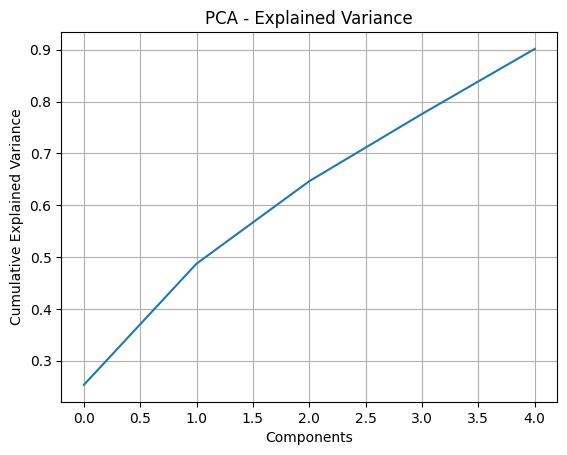

In [28]:
pca=PCA(n_components=5)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.title("PCA - Explained Variance")
plt.xlabel("Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# LINEAR REGRESSION

Linear Regression R2 : 0.575787706032451
MSE:  0.5558915986952442


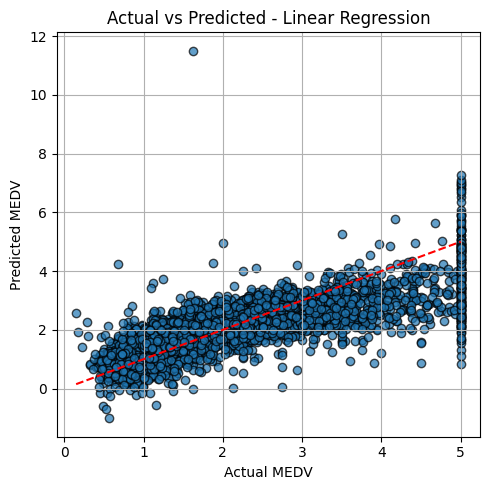

In [36]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)
print("Linear Regression R2 :",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted - Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()



# POLYNOMIAL REGRESSION

Polynomial Regression R2:  0.6456819729261944
MSE:  0.46430152383011697


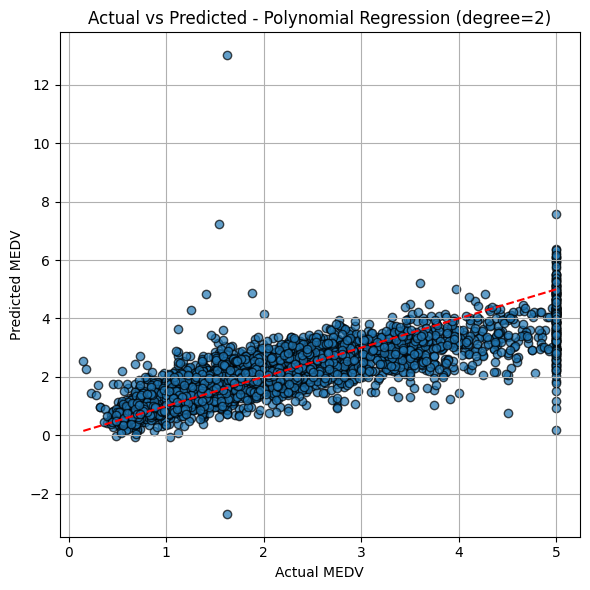

In [42]:
from sklearn.pipeline import make_pipeline
degree=2
poly_model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
poly_model.fit(X_train_scaled,y_train)
y_pred_poly=poly_model.predict(X_test_scaled)
print("Polynomial Regression R2: ",r2_score(y_test,y_pred_poly))
print("MSE: ",mean_squared_error(y_test,y_pred_poly))

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_poly, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted - Polynomial Regression (degree=2)")
plt.grid(True)
plt.tight_layout()
plt.show()